# Data

Please use the gender data. Use the weight to predict the height of the person. You can try different variants: per gender or for overall data. Please argue why did you prefer one variant over another in the report.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [67]:
data = pd.read_csv('/home/compvis/data/gender_data.csv')

In [68]:
data.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [488]:
data = data.iloc[np.random.permutation(len(data))]

In [489]:
data.head()

,Gender,Weight,Height
8263,Female,62.227338,120.936614
1806,Male,70.825603,173.963577
7824,Female,62.268769,138.622816
6315,Female,62.670157,111.080658
9956,Female,62.869566,140.298043


# Linear Regression


In [510]:
# data = data[data.Gender == 'Male']
X = data['Weight']
Y = data['Height']
max_x = X.max()
max_y = Y.max()
Y = Y.map(lambda y: y / max_y).as_matrix()
X = X.map(lambda x: x / max_x).as_matrix()
X = np.concatenate((np.array([1 for _ in range(len(X))]), X))
X.shape = (2, Y.size)
X = X.T
print X[:5], Y[:5]

[[ 1.          0.89654089]
 [ 1.          0.82429799]
 [ 1.          0.84726765]
 [ 1.          0.79359901]
 [ 1.          0.9235872 ]] [ 0.64433413  0.65978423  0.56001823  0.56998225  0.76855323]


In [511]:
size = len(X)
X_train, X_validation, X_test = X[: int(0.8 * size)], X[int(0.8 * size): int(0.9 * size)], X[int(0.9 * size): ]
Y_train, Y_validation, Y_test = Y[: int(0.8 * size)], Y[int(0.8 * size): int(0.9 * size)], Y[int(0.9 * size): ]
print len(X_train), len(X_validation), len(X_test)
print len(Y_train), len(Y_validation), len(Y_test)
print X_train.shape, Y_train.shape

4000 500 500
4000 500 500
(4000, 2) (4000,)


In [492]:
theta = np.random.uniform(size=2)
print theta, theta.shape

[ 0.26242084  0.47432185] (2,)


### Implement "loss" function

In [378]:
def loss(x, y, theta):
    arg = np.dot(x, theta.T) - y
    return np.sum(arg ** 2) / (2 * y.size)

In [493]:
loss(X_train, Y_train, theta)

0.0067619094917328471

In [173]:
# def loss(x, y, theta):
#     s = 0
#     data = np.vstack((x, y))
#     for i in range(len(x)):
#         item = data[:, i]
#         s += (predict(theta, item[0]) - item[1]) ** 2
#     return s / (2 * len(x))

### Implement "fit" function gradient descent

In [457]:
def fit(x, y, theta, alpha):
    arg = np.dot(x, theta.T) - y
    return theta - np.array([np.sum(arg * x[:, i]) for i in range(x.shape[1])]) * alpha / y.size

In [494]:
fit(X_train, Y_train, theta, 0.2)

array([ 0.2499163 ,  0.46466272])

In [304]:
# def fit(x, y, theta, alpha):
#     def temp(j):
#         s = 0
#         data = np.vstack((x, y))
#         for i in range(np.size(x)):
#             item = data[:, i]
#             s += (predict(theta, item[0]) - item[1]) * x[i][j]
#         return s
    
#     dJ = np.array([temp(j) for j in range(np.size(x[0]))]) / np.size(x)
# #     print dJ
#     theta = theta - alpha * dJ
#     return theta

### Implement "predict" function

In [380]:
def predict(theta, x):
    return theta.dot(x)

### Depict the plot of loss over iterations

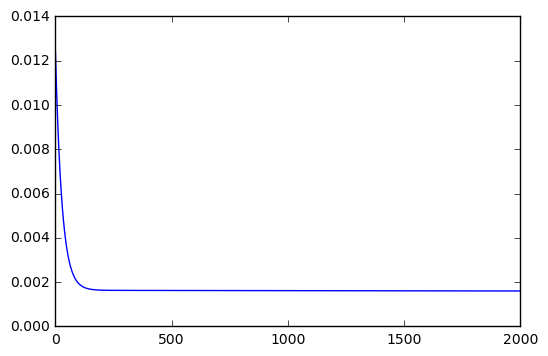

In [512]:
theta = np.random.uniform(size=2)
def iterate():
    global theta
    theta = fit(X_test, Y_test, theta, 0.01)
    return loss(X_test, Y_test, theta)

losses = [iterate() for i in range(2000)]
plt.plot(losses)
plt.show()

### Choose the "learning rate" value, show the comparison to other values via loss plot

In [531]:
def learn(alpha):
    global theta
    theta = np.random.uniform(size=2)
    for i in range(20000):
        theta = fit(X_train, Y_train, theta, alpha)

Learning Rate:  0.2


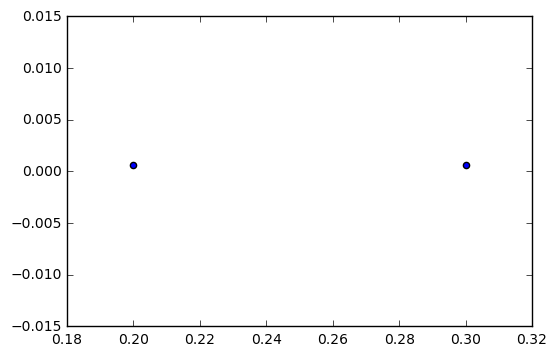

In [533]:
def chooseAlpha(start):
    global theta
    l = 65000
    for _ in range(10):
        learn(start)
        t = loss(X_validation, Y_validation, theta)
        plt.scatter(start, t)
        if (t > l):
            break
        l = t
        start /= 1.5
    return start

alpha = chooseAlpha(0.3)
print "Learning Rate: ", alpha
plt.show()

### Plot the regression line you have found 

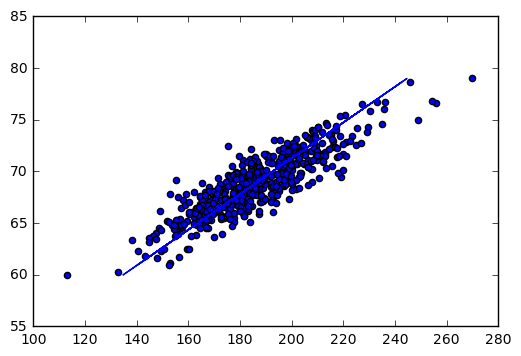

In [534]:
learn(alpha)
predicted = [max_y * predict(theta, X_test[i]) for i in range(len(X_test))]
plt.plot(predicted, X_test[:, 1] * max_x)
plt.scatter(Y_test * max_y, X_test[:, 1] * max_x)
plt.show()